In [1]:
!pip install -U qiskit qiskit-aer qiskit-ibm-runtime


In [2]:
# Grover's Search Algorithm using Qiskit 2.x
%matplotlib inline
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt


In [3]:
def oracle(qc, n, marked_state):
    """Constructs the oracle for the marked state."""
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)  # use mcx() in Qiskit 2.x
    qc.h(n - 1)
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)

In [4]:
def diffuser(qc, n):
    """Implements the Grover diffuser."""
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    qc.x(range(n))
    qc.h(range(n))

def grover_search(marked_state):
    """Builds Grover's search circuit for a given marked state."""
    n = len(marked_state)
    qc = QuantumCircuit(n, n)
    qc.h(range(n))
    oracle(qc, n, marked_state)
    diffuser(qc, n)
    qc.measure(range(n), range(n))
    return qc

In [5]:
def run_grover(qc):
    """Executes the Grover circuit and displays the result."""
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=1024).result()
    counts = result.get_counts()
    plot_histogram(counts)
    plt.show()

if __name__ == "__main__":
    marked_state = "101"
    print("Searching for marked state:", marked_state)
    qc = grover_search(marked_state)
    print(qc.draw(fold=-1))
    run_grover(qc)

Searching for marked state: 101
     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║ └╥┘
c: 3/════════════════════════════════════════════════════════╩══╩══╩═
                                                             0  1  2 


In [6]:
# --- Imports ---
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# --- Helper Functions (from your original code, slightly modified) ---

def oracle(qc, n, marked_state):
    """Constructs the oracle for the marked state."""
    # Qiskit's bit ordering is from right to left (q0 is the rightmost bit)
    # We reverse the string to match this intuition, so "101" targets qubit 2=1, qubit 1=0, qubit 0=1
    for i, bit in enumerate(reversed(marked_state)):
        if bit == "0":
            qc.x(i)

    # Apply multi-controlled Z-gate (implemented as H-MCX-H)
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)

    # Flip bits back
    for i, bit in enumerate(reversed(marked_state)):
        if bit == "0":
            qc.x(i)

def diffuser(qc, n):
    """Implements the Grover diffuser (reflection about the |s> state)."""
    qc.h(range(n))
    qc.x(range(n))

    # Apply multi-controlled Z-gate
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)

    qc.x(range(n))
    qc.h(range(n))

def run_ideal_simulation(qc, title="Ideal Simulation"):
    """Executes the circuit on an ideal simulator and plots the histogram."""
    print(f"--- Running: {title} ---")
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=1024).result()
    counts = result.get_counts()

    print(f"Counts: {counts}")
    plot_histogram(counts, title=title)
    plt.show() # In Colab, plt.show() is good practice to display the plot
    return counts

print("Setup complete. Helper functions are defined.")

Setup complete. Helper functions are defined.


In [7]:
# --- Original Problem (for reference) ---
print("--- Running Original 3-Qubit Search for '101' ---")
marked_state_original = "101"
n_original = len(marked_state_original)

# Build the circuit with 1 iteration
qc_original = QuantumCircuit(n_original, n_original)
qc_original.h(range(n_original))
oracle(qc_original, n_original, marked_state_original)
diffuser(qc_original, n_original)
qc_original.measure(range(n_original), range(n_original))

# Run and plot
run_ideal_simulation(qc_original, title="Original Search for '101' (1 Iteration)")

--- Running Original 3-Qubit Search for '101' ---
--- Running: Original Search for '101' (1 Iteration) ---
Counts: {'111': 41, '011': 35, '001': 38, '000': 18, '010': 39, '100': 32, '110': 29, '101': 792}


{'111': 41,
 '011': 35,
 '001': 38,
 '000': 18,
 '010': 39,
 '100': 32,
 '110': 29,
 '101': 792}

In [8]:
# --- Task 1: Change the marked state ("001") ---
marked_state_task1_a = "001"
n_task1_a = len(marked_state_task1_a)

qc_task1_a = QuantumCircuit(n_task1_a, n_task1_a)
qc_task1_a.h(range(n_task1_a))
oracle(qc_task1_a, n_task1_a, marked_state_task1_a)
diffuser(qc_task1_a, n_task1_a)
qc_task1_a.measure(range(n_task1_a), range(n_task1_a))

run_ideal_simulation(qc_task1_a, title="Task 1: Search for '001'")

--- Running: Task 1: Search for '001' ---
Counts: {'000': 37, '010': 34, '101': 20, '011': 36, '111': 43, '100': 29, '110': 27, '001': 798}


{'000': 37,
 '010': 34,
 '101': 20,
 '011': 36,
 '111': 43,
 '100': 29,
 '110': 27,
 '001': 798}

In [9]:
# --- Task 1: Change the marked state ("110") ---
marked_state_task1_b = "110"
n_task1_b = len(marked_state_task1_b)

qc_task1_b = QuantumCircuit(n_task1_b, n_task1_b)
qc_task1_b.h(range(n_task1_b))
oracle(qc_task1_b, n_task1_b, marked_state_task1_b)
diffuser(qc_task1_b, n_task1_b)
qc_task1_b.measure(range(n_task1_b), range(n_task1_b))

run_ideal_simulation(qc_task1_b, title="Task 1: Search for '110'")

--- Running: Task 1: Search for '110' ---
Counts: {'111': 28, '011': 33, '010': 25, '000': 40, '101': 39, '100': 30, '001': 30, '110': 799}


{'111': 28,
 '011': 33,
 '010': 25,
 '000': 40,
 '101': 39,
 '100': 30,
 '001': 30,
 '110': 799}

In [10]:
# --- Task 2: Modify the number of qubits (4 qubits) ---
marked_state_task2 = "1011"
n_task2 = len(marked_state_task2)

qc_task2 = QuantumCircuit(n_task2, n_task2)
qc_task2.h(range(n_task2))
oracle(qc_task2, n_task2, marked_state_task2)
diffuser(qc_task2, n_task2)
qc_task2.measure(range(n_task2), range(n_task2))

run_ideal_simulation(qc_task2, title="Task 2: 4-Qubit Search for '1011' (1 Iteration)")

--- Running: Task 2: 4-Qubit Search for '1011' (1 Iteration) ---
Counts: {'1101': 23, '0110': 29, '1000': 31, '1011': 500, '0111': 39, '0011': 46, '1110': 35, '1100': 36, '0101': 33, '1001': 36, '0000': 35, '0010': 33, '0001': 40, '1111': 41, '0100': 30, '1010': 37}


{'1101': 23,
 '0110': 29,
 '1000': 31,
 '1011': 500,
 '0111': 39,
 '0011': 46,
 '1110': 35,
 '1100': 36,
 '0101': 33,
 '1001': 36,
 '0000': 35,
 '0010': 33,
 '0001': 40,
 '1111': 41,
 '0100': 30,
 '1010': 37}

In [11]:
# --- Task 3: Add multiple iterations ---
marked_state_task3 = "1011"
n_task3 = len(marked_state_task3)
N_task3 = 2**n_task3

# Calculate optimal iterations
R_task3 = int(np.floor(np.pi / 4 * np.sqrt(N_task3)))
print(f"--- Task 3: 4-Qubit Search ({N_task3} items) ---")
print(f"Optimal iterations: {R_task3}")

qc_task3 = QuantumCircuit(n_task3, n_task3)
qc_task3.h(range(n_task3)) # Initial superposition

# Apply Grover iterations (Oracle + Diffuser)
for _ in range(R_task3):
    oracle(qc_task3, n_task3, marked_state_task3)
    diffuser(qc_task3, n_task3)

qc_task3.measure(range(n_task3), range(n_task3))

run_ideal_simulation(qc_task3, title=f"Task 3: 4-Qubit Search with {R_task3} Iterations")

--- Task 3: 4-Qubit Search (16 items) ---
Optimal iterations: 3
--- Running: Task 3: 4-Qubit Search with 3 Iterations ---
Counts: {'1110': 1, '0010': 1, '1011': 989, '0111': 4, '0011': 3, '0101': 2, '1001': 2, '1100': 6, '0001': 3, '1111': 1, '1101': 3, '1000': 2, '0110': 1, '1010': 2, '0100': 2, '0000': 2}


{'1110': 1,
 '0010': 1,
 '1011': 989,
 '0111': 4,
 '0011': 3,
 '0101': 2,
 '1001': 2,
 '1100': 6,
 '0001': 3,
 '1111': 1,
 '1101': 3,
 '1000': 2,
 '0110': 1,
 '1010': 2,
 '0100': 2,
 '0000': 2}

--- Task 4: Visualizing Circuit from Task 3 ---


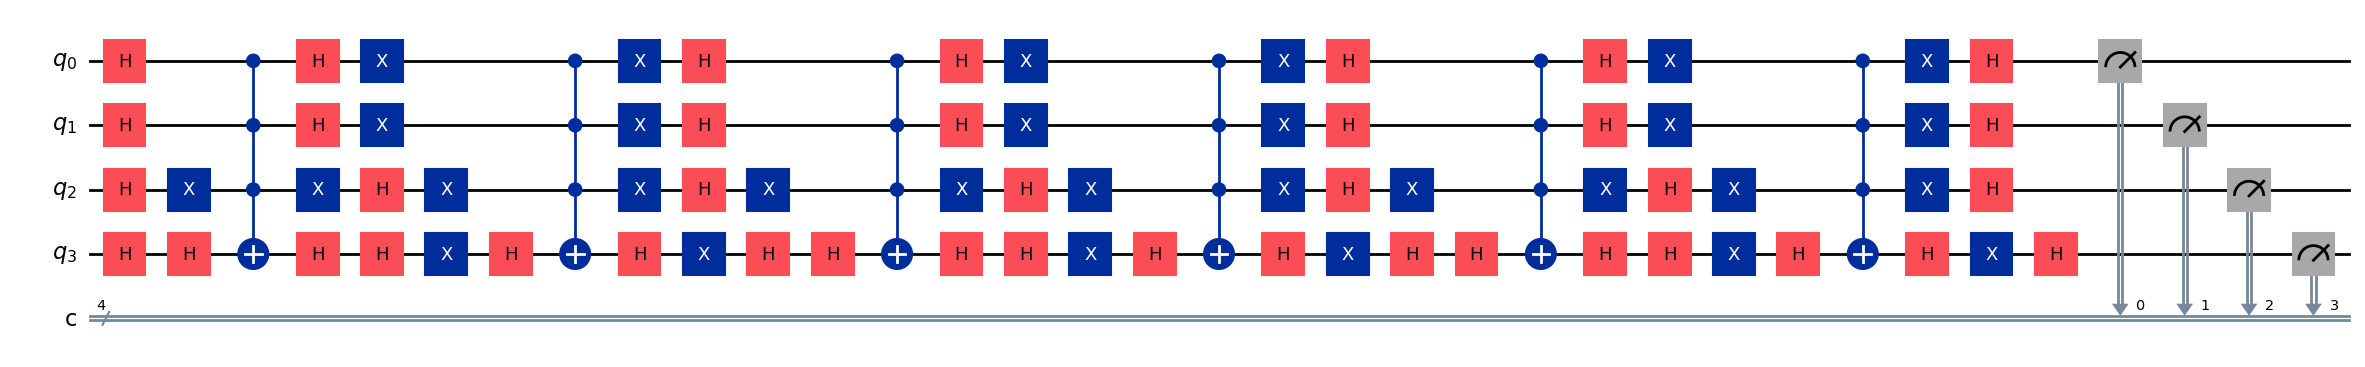

In [12]:
# --- Task 4: Circuit Visualization (Modified) ---
print("--- Task 4: Visualizing Circuit from Task 3 ---")

fig = qc_task3.draw('mpl', fold=-1)

fig

In [13]:
!pip install pylatexenc

--- Task 5: Running with Noise (using Runtime's FakeManilaV2) ---
--- Running: Task 5: Ideal Run (for comparison) ---
Counts: {'001': 32, '100': 45, '011': 33, '111': 37, '000': 21, '010': 29, '101': 794, '110': 33}
Plotting Ideal vs. Noisy results...


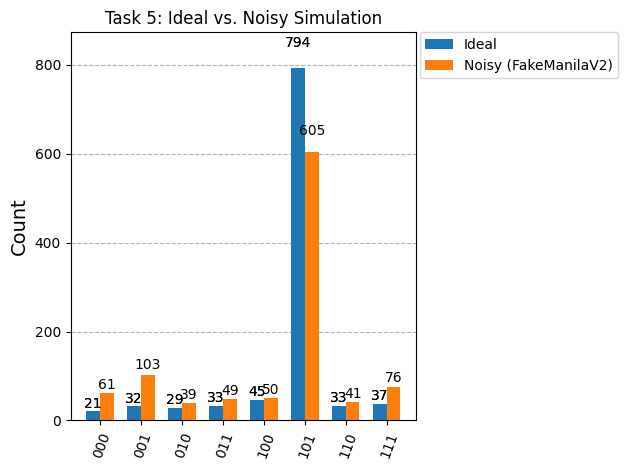

In [15]:
# --- Task 5: Experiment with Noise (Corrected Version 3) ---
try:
    from qiskit_ibm_runtime.fake_provider import FakeManilaV2
    from qiskit_aer import AerSimulator
    from qiskit_aer.noise import NoiseModel
    from qiskit import QuantumCircuit, transpile
    from qiskit.visualization import plot_histogram
    import matplotlib.pyplot as plt

    print("--- Task 5: Running with Noise (using Runtime's FakeManilaV2) ---")

    # 1. Get a mock backend (V2 is the modern version)
    backend_task5 = FakeManilaV2()

    # 2. Build a noise model from the backend's properties
    noise_model_task5 = NoiseModel.from_backend(backend_task5)

    # 3. Get coupling map and basis gates
    coupling_map_task5 = backend_task5.configuration().coupling_map
    basis_gates_task5 = backend_task5.configuration().basis_gates

    # 4. Create the noisy simulator
    noisy_simulator = AerSimulator.from_backend(backend_task5)

    # 5. We'll re-run the simple 3-qubit search ("101")
    marked_state_task5 = "101"
    n_task5 = len(marked_state_task5)

    # Check oracle/diffuser definitions
    if 'oracle' not in globals() or 'diffuser' not in globals():
        raise Exception("oracle() and diffuser() must be defined before running Task 5.")

    qc_task5 = QuantumCircuit(n_task5, n_task5)
    qc_task5.h(range(n_task5))
    oracle(qc_task5, n_task5, marked_state_task5)
    diffuser(qc_task5, n_task5)
    qc_task5.measure(range(n_task5), range(n_task5))

    # 6. Transpile for the noisy simulator
    transpiled_qc_task5 = transpile(qc_task5, noisy_simulator)

    # 7. Run and get noisy results
    result_noisy = noisy_simulator.run(transpiled_qc_task5, shots=1024).result()
    counts_noisy = result_noisy.get_counts()

    # 8. Get ideal results for comparison
    counts_ideal = run_ideal_simulation(qc_task5, title="Task 5: Ideal Run (for comparison)")

    # 9. Plot both histograms
    print("Plotting Ideal vs. Noisy results...")
    fig = plot_histogram(
    [counts_ideal, counts_noisy],
    legend=['Ideal', 'Noisy (FakeManilaV2)'],
    title="Task 5: Ideal vs. Noisy Simulation"
    )
    display(fig)


except ImportError:
    print("--- Task 5: FAILED ---")
    print("Could not import 'qiskit_ibm_runtime.fake_provider'.")
    print("Please install/update it with '!pip install qiskit-ibm-runtime -U'")
except Exception as e:
    print(f"--- Task 5: FAILED ---")
    print(f"An error occurred: {e}")


--- Task 6: Realistic Noisy Quantum Simulation ---
Simulating real quantum hardware with noise models

Creating realistic noise model...


✓ Noise model created with realistic parameters:
  - Single-qubit gate error: 0.100%
  - Two-qubit gate error: 1.0%
  - T1 (relaxation): 50 μs
  - T2 (dephasing): 70 μs
  - Readout error: 2%

Running noisy simulation (simulating real hardware behavior)...
✓ Noisy simulation complete

Running ideal simulation for comparison...
--- Running: Task 6: Ideal Run ---
Counts: {'000': 34, '010': 23, '110': 34, '001': 34, '100': 31, '011': 32, '111': 36, '101': 800}

Results Analysis:
Target state: |101⟩
Ideal success probability: 78.12%
Noisy success probability: 56.35%
Degradation due to noise: 21.78%



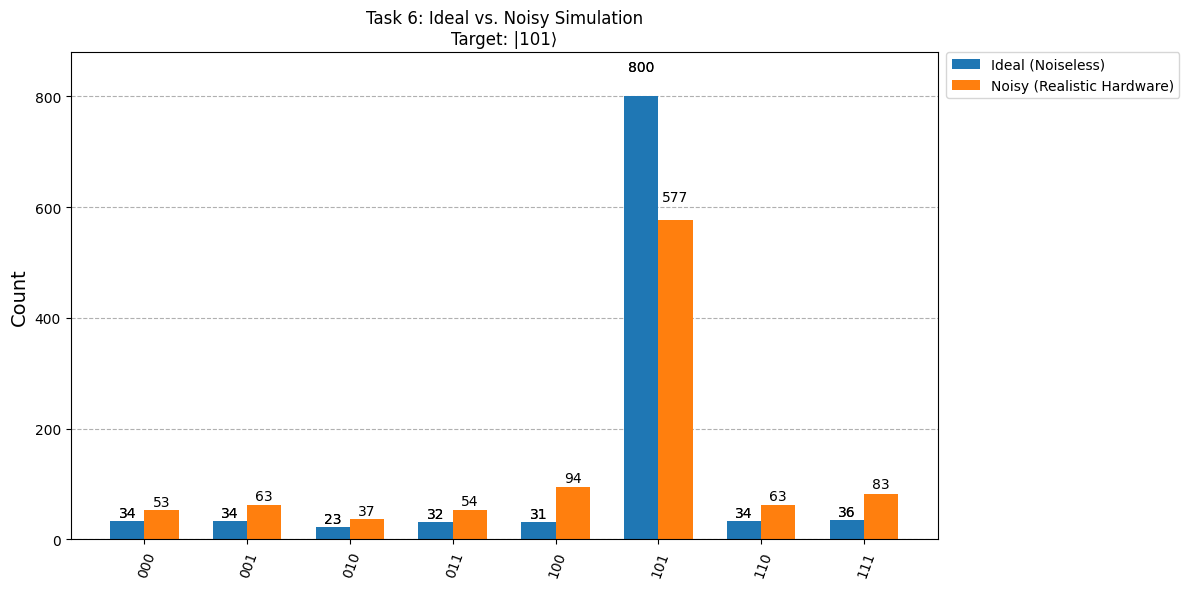


Error Distribution:
Top 5 measured states:
  1. |101⟩:  577 shots (56.35%) ✓ TARGET
  2. |100⟩:   94 shots ( 9.18%) 
  3. |111⟩:   83 shots ( 8.11%) 
  4. |110⟩:   63 shots ( 6.15%) 
  5. |001⟩:   63 shots ( 6.15%) 

This simulation demonstrates how real quantum hardware
behaves with realistic noise, decoherence, and readout errors.

BONUS: Compare different noise levels

Comparing three hardware quality levels:

Low Quality         : 52.44% success rate
Medium Quality      : 68.07% success rate
High Quality        : 76.95% success rate


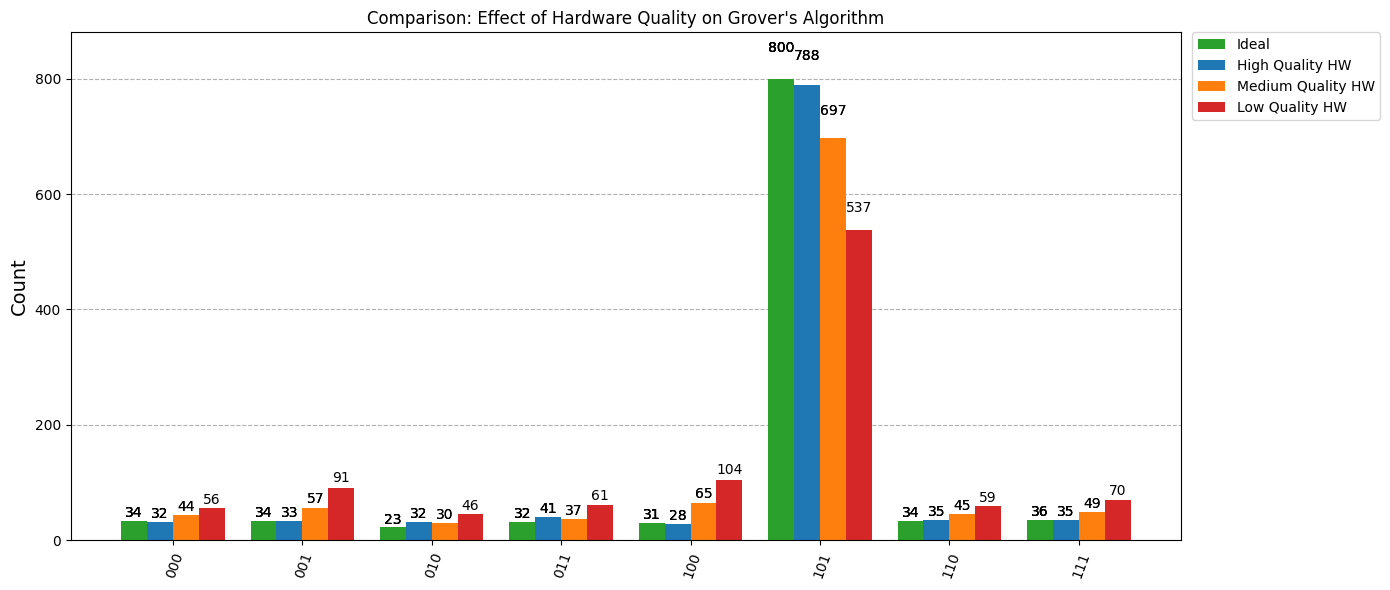


✓ Bonus analysis complete!


In [17]:
# --- Task 6: Realistic Noisy Quantum Simulation (No API Key Required) ---
%matplotlib inline

import matplotlib.pyplot as plt
from IPython.display import display

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error, thermal_relaxation_error
from qiskit.visualization import plot_histogram
import numpy as np

print("--- Task 6: Realistic Noisy Quantum Simulation ---")
print("Simulating real quantum hardware with noise models\n")

try:
    # 1) Build the 3-qubit oracle/diffuser circuit
    marked_state_task6 = "101"
    n_task6 = len(marked_state_task6)

    if 'oracle' not in globals() or 'diffuser' not in globals():
        raise RuntimeError("oracle() and diffuser() are not defined. Run Cell 1.")

    qc_task6 = QuantumCircuit(n_task6, n_task6)
    qc_task6.h(range(n_task6))
    oracle(qc_task6, n_task6, marked_state_task6)
    diffuser(qc_task6, n_task6)
    qc_task6.measure(range(n_task6), range(n_task6))

    # 2) Create a realistic noise model
    print("Creating realistic noise model...")
    noise_model = NoiseModel()

    # Gate error probabilities (typical for current quantum hardware)
    # Single-qubit gate error: ~0.1%
    # Two-qubit gate error: ~0.5-1%
    single_qubit_error = 0.001
    two_qubit_error = 0.01

    # Depolarizing errors for single and two-qubit gates
    error_1q = depolarizing_error(single_qubit_error, 1)
    error_2q = depolarizing_error(two_qubit_error, 2)

    # Add errors to all single-qubit gates
    noise_model.add_all_qubit_quantum_error(error_1q, ['h', 'x', 'z', 's', 't', 'sdg', 'tdg'])

    # Add errors to all two-qubit gates
    noise_model.add_all_qubit_quantum_error(error_2q, ['cx', 'cz', 'swap'])

    # Thermal relaxation (T1 and T2 times in microseconds)
    # Typical values for superconducting qubits
    T1 = 50  # microseconds (amplitude damping time)
    T2 = 70  # microseconds (dephasing time)
    gate_time_1q = 0.05  # 50 nanoseconds for single-qubit gates
    gate_time_2q = 0.3   # 300 nanoseconds for two-qubit gates

    # Add thermal relaxation errors
    thermal_error_1q = thermal_relaxation_error(T1, T2, gate_time_1q)
    thermal_error_2q = thermal_relaxation_error(T1, T2, gate_time_2q)

    noise_model.add_all_qubit_quantum_error(
        thermal_error_1q.compose(error_1q), ['h', 'x', 'z', 's', 't', 'sdg', 'tdg']
    )
    noise_model.add_all_qubit_quantum_error(
        thermal_error_2q.compose(error_2q), ['cx', 'cz', 'swap']
    )

    # Measurement error (typical ~1-2%)
    from qiskit_aer.noise import ReadoutError
    readout_error = 0.02
    readout_probs = [[1 - readout_error, readout_error],
                     [readout_error, 1 - readout_error]]
    readout_error_obj = ReadoutError(readout_probs)
    noise_model.add_all_qubit_readout_error(readout_error_obj)

    print("✓ Noise model created with realistic parameters:")
    print(f"  - Single-qubit gate error: {single_qubit_error*100:.3f}%")
    print(f"  - Two-qubit gate error: {two_qubit_error*100:.1f}%")
    print(f"  - T1 (relaxation): {T1} μs")
    print(f"  - T2 (dephasing): {T2} μs")
    print(f"  - Readout error: {readout_error*100:.0f}%\n")

    # 3) Run noisy simulation
    print("Running noisy simulation (simulating real hardware behavior)...")
    backend_noisy = AerSimulator(noise_model=noise_model)
    transpiled_noisy = transpile(qc_task6, backend_noisy)
    job_noisy = backend_noisy.run(transpiled_noisy, shots=1024)
    result_noisy = job_noisy.result()
    counts_noisy = result_noisy.get_counts()
    print("✓ Noisy simulation complete\n")

    # 4) Run ideal simulation for comparison
    if 'run_ideal_simulation' not in globals():
        raise RuntimeError("run_ideal_simulation() not defined.")

    print("Running ideal simulation for comparison...")
    counts_ideal_task6 = run_ideal_simulation(qc_task6, title="Task 6: Ideal Run")

    # 5) Calculate fidelity and success probability
    marked_state = marked_state_task6
    total_shots = sum(counts_noisy.values())

    ideal_success = counts_ideal_task6.get(marked_state, 0)
    noisy_success = counts_noisy.get(marked_state, 0)

    ideal_prob = ideal_success / sum(counts_ideal_task6.values()) * 100
    noisy_prob = noisy_success / total_shots * 100

    print(f"\nResults Analysis:")
    print(f"Target state: |{marked_state}⟩")
    print(f"Ideal success probability: {ideal_prob:.2f}%")
    print(f"Noisy success probability: {noisy_prob:.2f}%")
    print(f"Degradation due to noise: {ideal_prob - noisy_prob:.2f}%\n")

    # 6) Plot comparison
    fig = plot_histogram(
        [counts_ideal_task6, counts_noisy],
        legend=['Ideal (Noiseless)', 'Noisy (Realistic Hardware)'],
        title=f"Task 6: Ideal vs. Noisy Simulation\nTarget: |{marked_state}⟩",
        figsize=(12, 6),
        color=['#1f77b4', '#ff7f0e']
    )
    display(fig)
    plt.show()

    # 7) Additional analysis - error distribution
    print("\nError Distribution:")
    # Sort states by probability in noisy simulation
    sorted_states = sorted(counts_noisy.items(), key=lambda x: x[1], reverse=True)
    print(f"Top 5 measured states:")
    for i, (state, count) in enumerate(sorted_states[:5], 1):
        prob = count / total_shots * 100
        marker = "✓ TARGET" if state == marked_state else ""
        print(f"  {i}. |{state}⟩: {count:4d} shots ({prob:5.2f}%) {marker}")

    print("\n" + "="*60)
    print("This simulation demonstrates how real quantum hardware")
    print("behaves with realistic noise, decoherence, and readout errors.")
    print("="*60)

except Exception as e:
    print("\n--- Task 6: FAILED ---")
    print(f"An error occurred: {e}")
    print("\nHints:")
    print("- Ensure you have qiskit and qiskit-aer installed:")
    print("  !pip install qiskit qiskit-aer")
    print("- Make sure oracle(), diffuser(), and run_ideal_simulation()")
    print("  are defined earlier in the notebook.")


# --- BONUS: Alternative - Try with different noise levels ---
print("\n" + "="*60)
print("BONUS: Compare different noise levels")
print("="*60)

def run_with_noise_level(circuit, noise_level_name, single_q_err, two_q_err, readout_err):
    """Run simulation with specified noise parameters"""
    noise_model = NoiseModel()

    error_1q = depolarizing_error(single_q_err, 1)
    error_2q = depolarizing_error(two_q_err, 2)

    noise_model.add_all_qubit_quantum_error(error_1q, ['h', 'x', 'z', 's', 't'])
    noise_model.add_all_qubit_quantum_error(error_2q, ['cx', 'cz'])

    readout_probs = [[1 - readout_err, readout_err],
                     [readout_err, 1 - readout_err]]
    readout_error_obj = ReadoutError(readout_probs)
    noise_model.add_all_qubit_readout_error(readout_error_obj)

    backend = AerSimulator(noise_model=noise_model)
    transpiled = transpile(circuit, backend)
    job = backend.run(transpiled, shots=1024)
    result = job.result()

    return result.get_counts()

try:
    # Compare three noise levels
    print("\nComparing three hardware quality levels:\n")

    # Low-quality hardware (older generation)
    counts_low = run_with_noise_level(qc_task6, "Low Quality", 0.005, 0.02, 0.05)

    # Medium-quality hardware (current typical)
    counts_med = run_with_noise_level(qc_task6, "Medium Quality", 0.001, 0.01, 0.02)

    # High-quality hardware (state-of-the-art)
    counts_high = run_with_noise_level(qc_task6, "High Quality", 0.0001, 0.001, 0.005)

    # Calculate success rates
    for name, counts in [("Low Quality", counts_low),
                         ("Medium Quality", counts_med),
                         ("High Quality", counts_high)]:
        success = counts.get(marked_state_task6, 0)
        total = sum(counts.values())
        prob = success / total * 100
        print(f"{name:20s}: {prob:5.2f}% success rate")

    # Plot all comparisons
    fig2 = plot_histogram(
        [counts_ideal_task6, counts_high, counts_med, counts_low],
        legend=['Ideal', 'High Quality HW', 'Medium Quality HW', 'Low Quality HW'],
        title=f"Comparison: Effect of Hardware Quality on Grover's Algorithm",
        figsize=(14, 6),
        color=['#2ca02c', '#1f77b4', '#ff7f0e', '#d62728']
    )
    display(fig2)
    plt.show()

    print("\n✓ Bonus analysis complete!")

except Exception as e:
    print(f"Bonus analysis failed: {e}")